# Image Classification Exemple

In [1]:
import os

from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

from paramModel import ModelRetrainer

Using TensorFlow backend.
/home/cyprien/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cyprien/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cyprien/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cyprien/anaconda3/envs/

ModuleNotFoundError: No module named 'paramModel'

In [2]:
dirpath = os.getcwd()
train_dataset_path = "../../../REI-Dataset/REI/"
labels = os.listdir(train_dataset_path)
print("{} classes found in the followimg directories :".format(len(labels)))
print(labels)

6 classes found in the followimg directories :
['bedroom', 'backyard', 'bathroom', 'frontyard', 'livingRoom', 'kitchen']


In [3]:
datagen = ImageDataGenerator(
        featurewise_center=True,
        samplewise_center=True,
        brightness_range=[0.5,1.5],
        rescale=1/255,
        validation_split=0.10,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
        )

['bedroom', 'backyard', 'bathroom', 'frontyard', 'livingRoom', 'kitchen']
Found 5284 images belonging to 6 classes.
Found 585 images belonging to 6 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b3 (Model)      (None, 1536)              10783528  
_________________________________________________________________
dense_1 (Dense)              (None, 120)               184440    
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 726       
Total params: 10,983,214
Trainable params: 10,895,918
Non-trainable params: 87,296
____________

W1018 16:40:14.314336 140606326773568 deprecation_wrapper.py:119] From /home/cyprien/anaconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1018 16:40:14.338338 140606326773568 deprecation_wrapper.py:119] From /home/cyprien/anaconda3/envs/tf/lib/python3.7/site-packages/keras/callbacks/tensorboard_v1.py:200: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W1018 16:40:14.338883 140606326773568 deprecation_wrapper.py:119] From /home/cyprien/anaconda3/envs/tf/lib/python3.7/site-packages/keras/callbacks/tensorboard_v1.py:203: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

/home/cyprien/anaconda3/envs/tf/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't

Epoch 1/2
83/83 [==============================] - 60s 724ms/step - loss: 1.8259 - accuracy: 0.2491 - val_loss: 1.8464 - val_accuracy: 0.2632


W1018 16:41:22.652625 140606326773568 deprecation_wrapper.py:119] From /home/cyprien/anaconda3/envs/tf/lib/python3.7/site-packages/keras/callbacks/tensorboard_v1.py:343: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.



Epoch 2/2
83/83 [==============================] - 44s 529ms/step - loss: 1.6270 - accuracy: 0.3185 - val_loss: 1.5245 - val_accuracy: 0.4376


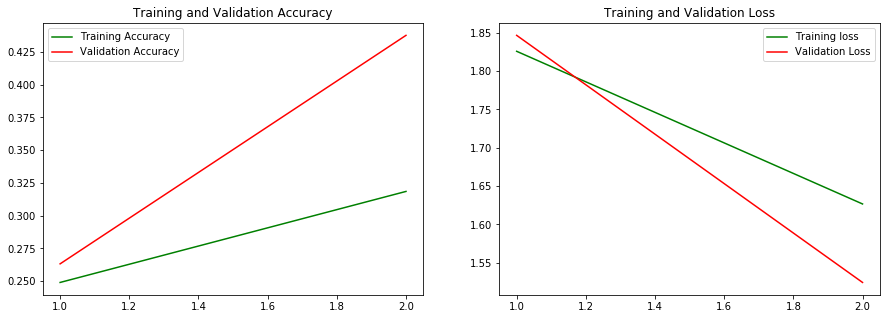

Saved final model : RoomRecognition
saved best model considering val_loss : RoomRecognition_best_model.h5


In [4]:
model_trainer = ModelRetrainer()
model_trainer.setModelType("EfficientNetB3")
model_trainer.setImageGenerator(datagen)
model_trainer.setDataDirectory(train_dataset_path)
model_trainer.setTrainConfig(image_size=32, batch_size=64, epoch_number=5, lr = 0.001, model_name="RoomRecognition")

model_trainer.trainModel()

In [6]:
loaded_model = load_model('RoomRecognition.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b3 (Model)      (None, 1536)              10783528  
_________________________________________________________________
dense_1 (Dense)              (None, 120)               184440    
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 726       
Total params: 10,983,214
Trainable params: 10,895,918
Non-trainable params: 87,296
_________________________________________________________________
